In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

## Data 불러오기

In [2]:
data1 = pd.read_excel('NS_reven.xlsx', 'rawdata_2019(완)', index=False)
data2 = pd.read_excel('NS_rate.xlsx', '시간대', index=False)

In [3]:
ns_rev = data1.rename(columns=data1.iloc[0])
NS_rev = ns_rev.drop(ns_rev.index[0])
ns_rate = data2.rename(columns=data2.iloc[0])
NS_rate = ns_rate.drop(ns_rate.index[0])

NS_rate.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
1,02:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
2,02:01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.012,0.003
3,02:02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
4,02:03,0,0,0.014,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
5,02:04,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004


In [4]:
NS_rev["방송일시"] = pd.to_datetime(NS_rev["방송일시"])

NS_rev["month"] = NS_rev['방송일시'].dt.month
NS_rev["day_of_month"] = NS_rev['방송일시'].dt.day
NS_rev["day_of_week"]  = NS_rev['방송일시'].dt.dayofweek
NS_rev["time"] = NS_rev['방송일시'].dt.time
NS_rev["hour"] = NS_rev['방송일시'].dt.hour
NS_rev["minute"] = NS_rev['방송일시'].dt.minute

NS_rev.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40


In [5]:
NS_rev.isnull().sum()

방송일시                0
노출(분)           16784
마더코드                0
상품코드                0
상품명                 0
상품군                 0
판매단가                0
취급액               937
month               0
day_of_month        0
day_of_week         0
time                0
hour                0
minute              0
dtype: int64

---

## NA Handling

### 1) 취급액 NA 제외

In [6]:
NS_rev = NS_rev[NS_rev['취급액'].notnull()]

### 2) 노출 시간 NA value를 직전 행의 값으로 대체 

In [7]:
NS_rev = NS_rev.fillna(method='pad')

In [8]:
NS_rev.head(n=10)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute
1,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0
2,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0
3,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20
4,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20
5,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40
6,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000,1,1,1,06:40:00,6,40
7,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000,1,1,1,07:00:00,7,0
8,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000,1,1,1,07:20:00,7,20
9,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000,1,1,1,07:40:00,7,40
10,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000,1,1,1,08:00:00,8,0


In [9]:
x1 = NS_rev['노출(분)']

x1.sort_values()[:25]

6691      2.466667
9538      2.816667
14978     3.000000
14026     3.000000
18533     3.166667
26450     3.283333
35964     3.450000
22693     5.166667
24780     5.166667
23899     5.166667
25921     5.333333
29466     5.466667
37739     6.633333
34864     6.666667
31055     6.683333
28592     6.850000
28050     6.850000
26921     7.266667
24373     8.850000
34530     9.700000
26483    10.000000
31832    10.000000
22238    10.000000
31833    10.000000
22237    10.000000
Name: 노출(분), dtype: float64

#### 노출 시간이 10분보다 짧은 경우 
* 다음 편성 전에 상품이 품절됐을 경우 
* 새벽 2시 채널 종료 시간보다 조금 일찍 끝났을 경우 
* 중간 광고 시간은 아닌 것 같다 (보통 광고 시간까지 편성표에 들어가지 않나..?)

### 3) 취급액이 5만원인 경우를 NA로 상정하고, 0으로 대체

In [10]:
NS_rev = NS_rev.replace({'취급액':50000}, {'취급액':0})

In [11]:
x6 = NS_rev['취급액']

x6.sort_values()[:20]

16305    0
5028     0
5024     0
27379    0
20813    0
14929    0
37502    0
14918    0
14915    0
20810    0
20809    0
9565     0
9566     0
24021    0
1942     0
9567     0
24033    0
9568     0
32500    0
9539     0
Name: 취급액, dtype: int64

---

### 판매량 변수

In [12]:
NS_rev['주문량'] = NS_rev['취급액'] / NS_rev['판매단가']
NS_rev.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
1,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0,52.606516
2,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0,109.548872
3,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20,81.754386
4,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20,174.310777
5,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40,167.218045


### 새 액셀 파일로 저장

In [13]:
NS_rev.to_excel('NS_revenue.xlsx', index=False)

---

# 상품군별 EDA

In [14]:
data = pd.read_excel('NS_revenue.xlsx', index=False)
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40,167.218045


In [15]:
data['노출(분)'].astype(float)

0        20.0
1        20.0
2        20.0
3        20.0
4        20.0
         ... 
37367    20.0
37368    20.0
37369    20.0
37370    20.0
37371    20.0
Name: 노출(분), Length: 37372, dtype: float64

In [16]:
clothes = data[data['상품군']=='의류']
clothes.drop('상품코드', axis=1, inplace=True)
clothes.head()

,방송일시,노출(분),마더코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
0,2019-01-01 06:00:00,20.0,100346,테이트 남성 셀린니트3종,의류,39900,2099000,1,1,1,06:00:00,6,0,52.606516
1,2019-01-01 06:00:00,20.0,100346,테이트 여성 셀린니트3종,의류,39900,4371000,1,1,1,06:00:00,6,0,109.548872
2,2019-01-01 06:20:00,20.0,100346,테이트 남성 셀린니트3종,의류,39900,3262000,1,1,1,06:20:00,6,20,81.754386
3,2019-01-01 06:20:00,20.0,100346,테이트 여성 셀린니트3종,의류,39900,6955000,1,1,1,06:20:00,6,20,174.310777
4,2019-01-01 06:40:00,20.0,100346,테이트 남성 셀린니트3종,의류,39900,6672000,1,1,1,06:40:00,6,40,167.218045


In [17]:
under = data[data['상품군']=='속옷']
under.drop('상품코드', axis=1, inplace=True)
under.head()

,방송일시,노출(분),마더코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
6,2019-01-01 07:00:00,20.0,100305,오모떼 레이스 파운데이션 브라,속옷,59000,6819000,1,1,1,07:00:00,7,0,115.576271
7,2019-01-01 07:20:00,20.0,100305,오모떼 레이스 파운데이션 브라,속옷,59000,15689000,1,1,1,07:20:00,7,20,265.915254
8,2019-01-01 07:40:00,20.0,100305,오모떼 레이스 파운데이션 브라,속옷,59000,25370000,1,1,1,07:40:00,7,40,430.000000
18,2019-01-01 11:00:00,20.0,100664,크로커다일 The 편안한 코튼 브라팬티 4세트,속옷,69900,24531000,1,1,1,11:00:00,11,0,350.944206
19,2019-01-01 11:20:00,20.0,100664,크로커다일 The 편안한 코튼 브라팬티 4세트,속옷,69900,49829000,1,1,1,11:20:00,11,20,712.861230


In [18]:
beauty = data[data['상품군']=='이미용']
beauty.drop('상품코드', axis=1, inplace=True)
beauty.head()

,방송일시,노출(분),마더코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
35,2019-01-01 17:00:00,20.0,100074,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,42239000,1,1,1,17:00:00,17,0,1061.281407
36,2019-01-01 17:20:00,20.0,100074,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,73494000,1,1,1,17:20:00,17,20,1846.582915
37,2019-01-01 17:40:00,20.0,100074,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,107103000,1,1,1,17:40:00,17,40,2691.030151
180,2019-01-03 08:00:00,20.0,100774,엘렌실라 달팽이크림(콜라겐5+팩트3),이미용,79000,13665000,1,3,3,08:00:00,8,0,172.974684
181,2019-01-03 08:20:00,20.0,100774,엘렌실라 달팽이크림(콜라겐5+팩트3),이미용,79000,26788000,1,3,3,08:20:00,8,20,339.088608


---

## 상품군 간 비교

In [19]:
kmh = data[data['상품군'].isin(['의류', '속옷', '이미용'])]

In [20]:
kmh2 = kmh.replace({'상품군':'의류'}, {'상품군':'clothes'})
kmh2 = kmh2.replace({'상품군':'속옷'}, {'상품군':'under'})
kmh2 = kmh2.replace({'상품군':'이미용'}, {'상품군':'beauty'})

In [21]:
kmh2.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day_of_month,day_of_week,time,hour,minute,주문량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,clothes,39900,2099000,1,1,1,06:00:00,6,0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,clothes,39900,4371000,1,1,1,06:00:00,6,0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,clothes,39900,3262000,1,1,1,06:20:00,6,20,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,clothes,39900,6955000,1,1,1,06:20:00,6,20,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,clothes,39900,6672000,1,1,1,06:40:00,6,40,167.218045


In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt ; plt.rcParams['font.family']='malgun'
import seaborn as sns

In [23]:
sns.set_style('whitegrid')

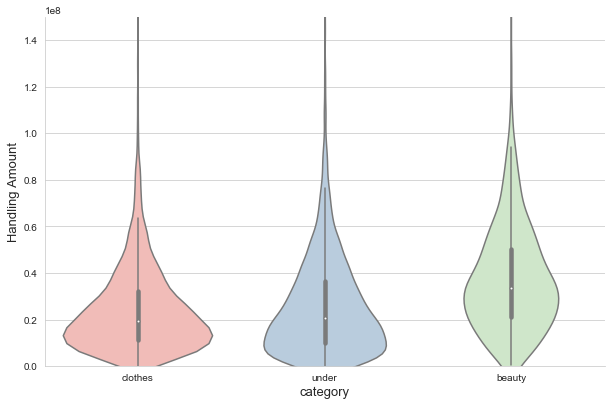

In [24]:
a = sns.catplot(x='상품군', y='취급액', data=kmh2, kind='violin', height=5.7, aspect=1.5, palette='Pastel1')
a.ax.set_xlabel('category', size=13)
a.ax.set_ylabel('Handling Amount', size=13)
a.ax.set_ylim(0,150000000)
plt.show()

* 이미용의 취급액이 대체로 더 높다

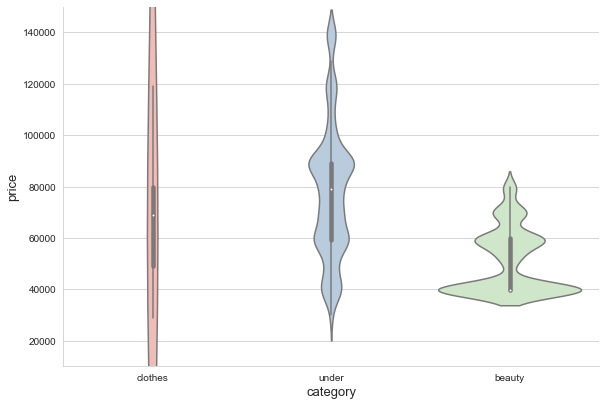

In [25]:
a = sns.catplot(x='상품군', y='판매단가', data=kmh2, kind='violin', height=5.7, aspect=1.5, palette='Pastel1')
a.ax.set_xlabel('category', size=13)
a.ax.set_ylabel('price', size=13)
a.ax.set_ylim(10000,150000)
plt.show()

* 의류의 판매 단가는 균등하게 분포 (200만원 이상까지)  
* 속옷은 2만원~15만원 사이에 균등하게 분포
* 이미용은 39000원이 두드러짐

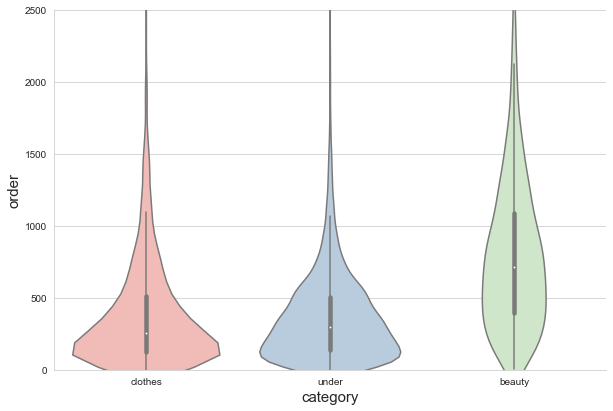

In [26]:
a = sns.catplot(x='상품군', y='주문량', data=kmh2, kind='violin', height=5.7, aspect=1.5, palette='Pastel1')
a.ax.set_xlabel('category', size=15)
a.ax.set_ylabel('order', size=15)
a.ax.set_ylim(0,2500)
plt.show()

* 상대적으로 제품 단가가 낮은 것이 많았던 이미용 제품의 주문량이 균등하게 분포

# 1. 의류

In [27]:
x = [0]
for i in range(clothes.shape[1]):
    x.append(clothes.iloc[:, i])

## 1-1) 노출 시간

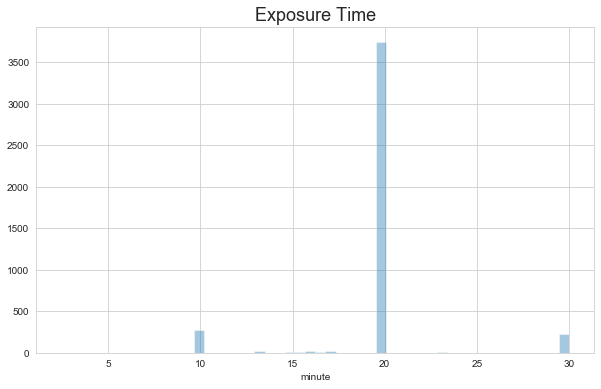

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.distplot(x[2], kde=False)
ax.set_title('Exposure Time', size=18)
ax.set_xlabel('minute')
plt.show()

In [29]:
x[2].value_counts(normalize=True)*100

20.000000    86.221198
10.000000     6.244240
30.000000     5.299539
13.000000     0.322581
15.166667     0.253456
16.100000     0.161290
15.000000     0.161290
17.100000     0.161290
16.700000     0.138249
17.166667     0.138249
23.200000     0.092166
16.083333     0.092166
16.200000     0.092166
13.166667     0.069124
17.183333     0.069124
16.333333     0.069124
16.016667     0.069124
14.833333     0.046083
16.666667     0.046083
16.683333     0.046083
15.866667     0.046083
16.166667     0.023041
14.666667     0.023041
2.466667      0.023041
15.833333     0.023041
5.333333      0.023041
15.083333     0.023041
15.666667     0.023041
Name: 노출(분), dtype: float64

* 20분 편성이 86%로 압도적

In [30]:
clothes2 = clothes[clothes['노출(분)'].isin([20, 10, 30])]

#### 노출시간 압도적인 20, 10, 30분만 따로 빼서 그래프

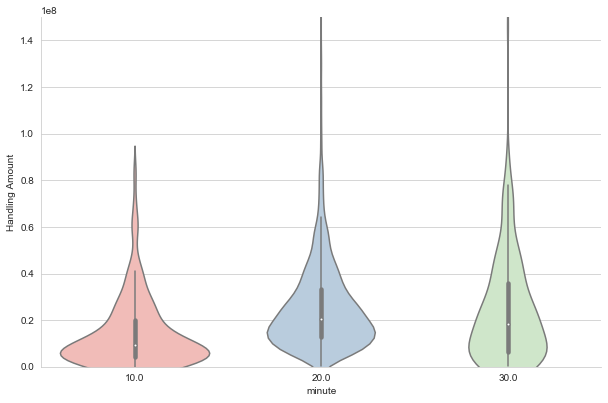

In [31]:
a = sns.catplot(x='노출(분)', y='취급액', data=clothes2, kind='violin', height=5.7, aspect=1.5, palette='Pastel1')
a.ax.set_xlabel('minute')
a.ax.set_ylabel('Handling Amount')
a.ax.set_ylim(0,150000000)
plt.show()

* 20분 편성이 가장 평균적으로 높게

### 1-2) 판매 단가

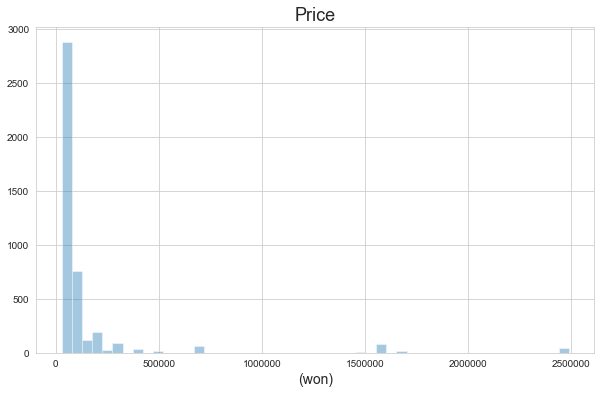

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.distplot(x[6], kde=False)
ax.set_title('Price', size=18)
ax.set_xlabel('(won)', size=14)
plt.show()

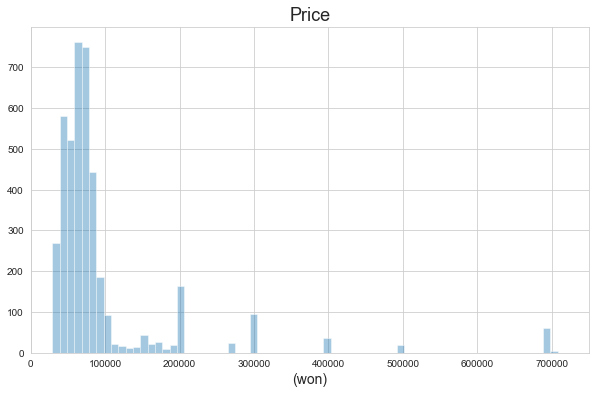

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.distplot(x[6], kde=False, bins=250)
ax.set_title('Price', size=18)
ax.set_xlabel('(won)', size=14)
ax.set_xlim(0,750000)
plt.show()

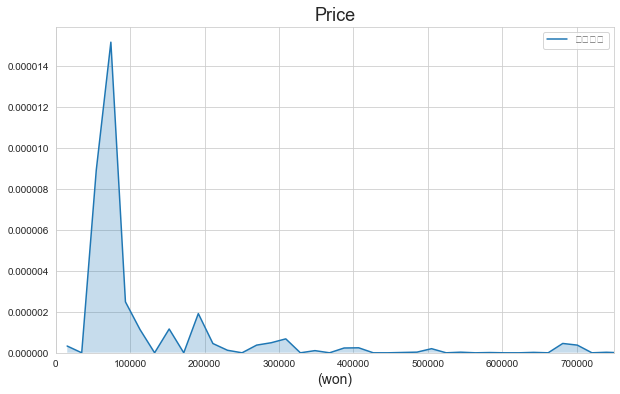

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.kdeplot(x[6], shade=True)
ax.set_title('Price', size=18)
ax.set_xlabel('(won)', size=14)
ax.set_xlim(0,750000)
plt.show()

### 1-3) 취급액

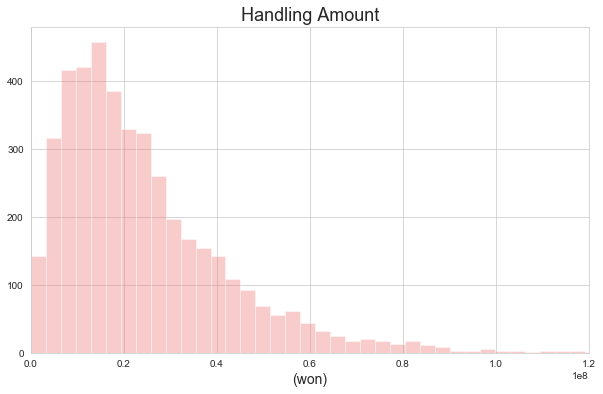

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.distplot(x[7], kde=False, color='lightcoral', bins=100)
ax.set_title('Handling Amount', size=18)
ax.set_xlabel('(won)', size=14)
ax.set_xlim(0,120000000)
plt.show()

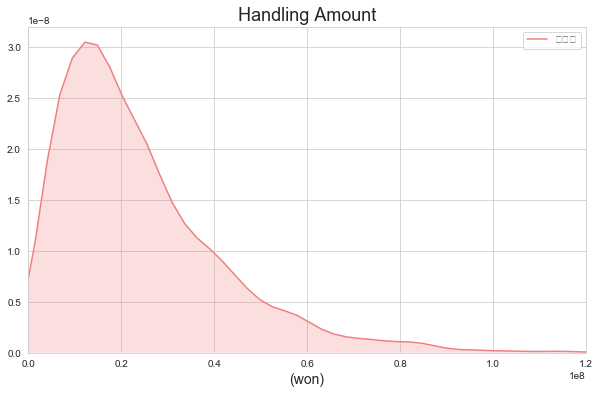

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.kdeplot(x[7], shade=True, color='lightcoral')
ax.set_title('Handling Amount', size=18)
ax.set_xlabel('(won)', size=14)
ax.set_xlim(0,120000000)
plt.show()

### 1-4) 주문량

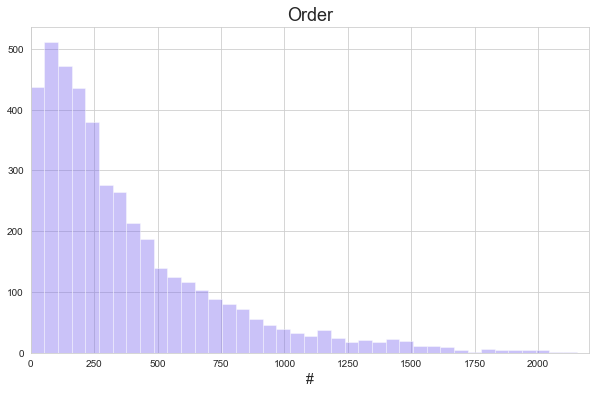

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.distplot(x[14], kde=False, bins=150, color='mediumslateblue')
ax.set_title('Order', size=18)
ax.set_xlabel('#', size=14)
ax.set_xlim(0, 2200)
plt.show()

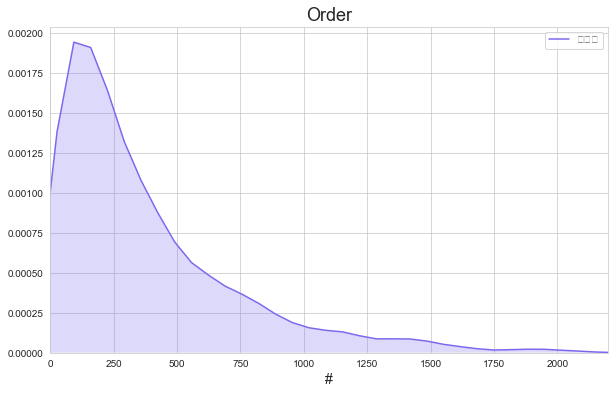

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.kdeplot(x[14], shade=True, color='mediumslateblue')
ax.set_title('Order', size=18)
ax.set_xlabel('#', size=14)
ax.set_xlim(0,2200)
plt.show()